# Data Mining on BBC News Topics

This project is coursework for the Data Mining module, which is part of the MSc Software Engineering and Internet Architecture programme at The University of Bradford.

## Introduction

The BBC states that "impartiality lies at the heart of public service and is the core of [our] commitment to... audiences" (BBC 2010). The first of the BBC's six values makes it imperative: "Trust is the foundation of the BBC; we are independent, impartial and honest" (BBC 2018). The BBC is committed to provide impartial content, not only in terms of ethics, but it is also stipulated in the Royal Charter, which is "is the constitutional basis for the BBC... [that] sets out the public purposes of the BBC [and] guarantees its independence" (BBC Trust 2017). The Royal Charter mandates that the BBC must treat particularly controversial subjects in the news with due impartiality (BBC 2010). The BBC's Editorial Guidelines go futher than that, and strive for "due impartiality" across all news topics (BBC 2010).

The BBC has strong reasons for monitoring the impartiality, or lack thereof, in its news output, especially as it has often been criticized for not living up to this core obligation. One very public criticism of BBC News impartiality standards was made on 16<sup>th</sup> February 2017 when Donald Trump, after asking a BBC reporter where he was from, disparagingly called the BBC "another beauty" (BBC News 2017a). When the reporter quoted part of the BBC values statement in response, Trump dismissed this counter with "yeah, sure... Just like CNN right?" (BBC News 2017a). Later that same month the White House banned BBC News from attending an imformal press briefing, incidentally CNN was also banned along with the New York Times (BBC News 2017b). Although he has never said this directly (to my knowledge) it strongly implies that US President Donald Trump does not believe that the BBC is impartial towards him. Therefore I decided that Donald Trump would be an interesting topic for investigation. 

BBC News is open about the fact that it finds impartiality about Climate Change difficult (Warburton et al. 2018). The BBC now accepts that disscenting voices on Climate Change must have the scientific basic to support them, otherwise the subject can suffer from 'false balance' or 'false equivalence' where pitting a scientist against a skeptic gives the audience a false impression of the argument (Warburton et al. 2018). The requirement of giving "due weight" has now been added to the editorial guidelines in order to avoid giving the an impression that skeptics have an equal weight of opinion against scientists from the global warming community (Warburton et al. 2018; BBC 2010). The BBC is incombant on presenters being knowledagble enough to challenge those being interviewed, and as a result, BBC News journalists wishing to write about Climate Change are required to attend a specialist training course (Warburton et al. 2018). Since the BBC is going to great pains to show due impartiality in regard to Climate Change, I decided to pick this as my second topic. 

The subject of determining a measure of impartiality of news stories is a massive problem space and is out of the scope for this coursework. The aim of this coursework is to conduct some preliminary investigations that might give guidance regarding the best and most futile approaches to take in futher research.

### Introduction to the Data

BBC News, along with other BBC online content, is tagged with metadata managed by an internal team called Linked Data Platform (LDP) and these tags are known as LDP tags. Some LDP tags have special relevance and are called a 'topic tag'. When a news story is tagged with a topic tag, it suggests that that story predominantly belongs to a particular topic, such as a place or person. I am interested in the topics 'Donald Trump' and 'Climate Change'.  

The data is all publicly available on the various BBC News websites and could be obtained through the difficult task of crawling BBC News online, finding news stories tagged with 'Climate Change' or 'Donald Trump', then selecting, scraping and storing the relevant text. As a Software Engineer at the BBC, I was able to ask a colleague working in LDP for a favour. He obtained the all the BBC News articles which were tagged with 'Climate Change' or 'Donald Trump'  and were last published between January 2017 and April 2018 for me. He transferred them to me as two large JSON documents, one for each topic. 

I am using Pandas, which is a Python-based Data Analytics Library for most of this coursework (Pandas 2018). I will be utilizing Pandas dataframes which are a convenient way to read in and work with JSON data and also visualize them in a table. I start by reading in and looking at the data that I have. 

In [1]:
import pandas as pd

allCc = pd.read_json('climate_change_data_subset.json')
allTrump = pd.read_json('trump_data_subset.json')

In [2]:
allCc.head()

,assetId,assetUri,body,headline,language,lastPublished,summary,title
0,38391034,/news/business-38391034,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",India's double first in climate battle,en-gb,2017-01-08T14:55:00+00:00,India opens two world-leading clean energy pro...,BBC News - India's double first in climate battle
1,38527710,/ukrainian/news-38527710,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",В Україну з півдня насуваються снігопади,uk,2017-01-06T06:31:56+00:00,"Через циклон, який насувається з Чорного моря,...",BBC Україна - В Україну з півдня насуваються с...
2,38600431,/news/uk-wales-38600431,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",£3m to protect Welsh and Irish coast from clim...,en-gb,2017-01-13T12:48:42+00:00,Coastal tourist sites most affected by climate...,BBC News - £3m to protect Welsh and Irish coas...
3,38745937,/news/science-environment-38745937,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Defining a true 'pre-industrial' climate period,en-gb,2017-01-25T23:11:25+00:00,Scientists suggest pushing back a baseline fro...,BBC News - Defining a true 'pre-industrial' cl...
4,39053678,/news/science-environment-39053678,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Most wood energy schemes are a 'disaster' for ...,en-gb,2017-04-23T14:02:03+00:00,A new report says that using wood pellets to g...,BBC News - Most wood energy schemes are a 'dis...


In [3]:
allTrump.head()

,assetId,assetUri,body,headline,language,lastPublished,summary,title
0,43597394,/portuguese/internacional-43597394,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",A pouco conhecida história de como os EUA leva...,pt-BR,2018-04-01T17:43:20+00:00,O governo americano foi o primeiro a violar o ...,BBC Brasil - A pouco conhecida história de com...
1,43607394,/portuguese/internacional-43607394,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",O ativista que criou uma identidade falsa para...,pt-BR,2018-04-02T07:34:34+00:00,Um ativista antirracismo passou um ano infiltr...,BBC Brasil - O ativista que criou uma identida...
2,43606088,/news/world-us-canada-43606088,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Donald Trump steps up attacks on Amazon,en-gb,2018-03-31T21:23:32+00:00,The president accuses the online retail giant ...,BBC News - Donald Trump steps up attacks on Am...
3,43601557,/news/world-us-canada-43601557,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",US may tie social media to visa applications,en-gb,2018-03-31T12:55:24+00:00,A state department proposal could require visa...,BBC News - US may tie social media to visa app...
4,43578462,/news/world-us-canada-43578462,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Is Trump ready for talks with North Korea?,en-gb,2018-03-30T21:20:28+00:00,What preparations is the White House making fo...,BBC News - Is Trump ready for talks with North...


## Data Cleaning

Immediately, by looking at the `head()` which shows me the first five lines in the dataframe, I notice two things. 
1. That the `lastPublished` dates run in the opposite orders. 
2. I have BBC News articles from across all the BBC News websites regardless of language. 

I am only interested in UK Domestic news in English so I address this first. I know from previously working on BBC News that these are all available in the `assetURI` path beginning with `/news`. I start by disregarding those that are not UK Domestic English language news.


In [4]:
print('ALL LANGUAGES \n Climate Change: {0}\n Trump: {1}'.format(len(allCc), len(allTrump)))

ALL LANGUAGES 
 Climate Change: 1808
 Trump: 5135


In [5]:
cc = allCc[allCc.assetUri.str.startswith('/news')]
trump = allTrump[allTrump.assetUri.str.startswith('/news')]

In [6]:
print('ENGLISH UK DOMESTIC \n Climate Change: {0}\n Trump: {1}'.format(len(cc), len(trump)))

ENGLISH UK DOMESTIC 
 Climate Change: 664
 Trump: 3254


I can immediately see that I now have far fewer articles for each topic. We can conduct a sanity check.

In [7]:
sum(trump['language'] != 'en-gb')

0

In [8]:
sum(cc['language'] != 'en-gb')

0

I will find out more information about the data I have remaining by printing the `.info()`.

In [9]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3254 entries, 2 to 5133
Data columns (total 8 columns):
assetId          3254 non-null int64
assetUri         3254 non-null object
body             3250 non-null object
headline         3254 non-null object
language         3254 non-null object
lastPublished    3254 non-null object
summary          3254 non-null object
title            3254 non-null object
dtypes: int64(1), object(7)
memory usage: 228.8+ KB


In [10]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 0 to 1805
Data columns (total 8 columns):
assetId          664 non-null int64
assetUri         664 non-null object
body             662 non-null object
headline         664 non-null object
language         664 non-null object
lastPublished    664 non-null object
summary          664 non-null object
title            664 non-null object
dtypes: int64(1), object(7)
memory usage: 46.7+ KB


I notice that four of the Donald Trump bodies are missing and also two of the Climate Change bodies. It is the main body of the news story that I am interested in, therefore these can be disregarded and removed. Keeping them would likely result in strange behaviour or even errors in data experiments later. 

In [11]:
cc = cc.dropna(axis=0, how='any')
trump = trump.dropna(axis=0, how='any')

I am also not interested in keeping the `assetId` or the `language` (which by now is all `en-gb` anyway).

In [12]:
cc = cc.drop(columns=['assetId','language'])
trump = trump.drop(columns=['assetId','language'])

The body of the article is not in plain text, it is stored in XML. The XML tags need to be removed in order to work with the text. I started by attempting to use open source libraries like Beautiful Soup, however, they are mainly for HTML tags. In addition, BBC News uses its own internal variant of XML called CandyXML and is therefore not entirely standard. I found it necessary to write my own data extraction method which removes the extraneous tags and other strange attributes I found by looking through the data. Since I am working with Pandas dataframes, I extracted the clean text straight into a new column. 

In [13]:
import re

def extract_text_into_new_column(df, column_name, new_column_name):
    temp_column = []
    for i in range(len(df)):
        text = df[column_name].iloc[i]
        tags = ["assetId", "assetTypeCode", "categoryId", "categoryName", 
                "crosshead", "changeQueueId", "embed", "hasShortForm", "language", 
                "provider", "publicationStatus", "workerCallingCard"]
        for tag in tags:
            tag_regex = '<'+ re.escape(tag) + '.*?' + re.escape(tag) + '>'
            text = re.sub(tag_regex, '', text)
        text = re.sub('<.*?>', '', text)
        timestamp_regex = '\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}\+\d{2}:\d{2}'
        text = re.sub(timestamp_regex, '', text)
        text = re.sub('&amp;', '&', text)
        text = re.sub('\.\.\.', ' ', text)
        whitespace_after_full_stop_regex = '(?<=[a-z])\.(?=[A-Z])'
        text = re.sub(whitespace_after_full_stop_regex, '. ', text)
        whitespace_after_question_mark_regex = '(?<=[a-z])\?(?=[A-Z])'
        text = re.sub(whitespace_after_question_mark_regex, '. ', text)
        temp_column.append(text)
    df[new_column_name] = temp_column

extract_text_into_new_column(cc, 'body', 'cleanBody')
extract_text_into_new_column(trump, 'body', 'cleanBody')
trump.head()

,assetUri,body,headline,lastPublished,summary,title,cleanBody
2,/news/world-us-canada-43606088,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Donald Trump steps up attacks on Amazon,2018-03-31T21:23:32+00:00,The president accuses the online retail giant ...,BBC News - Donald Trump steps up attacks on Am...,President Donald Trump has stepped up his atta...
3,/news/world-us-canada-43601557,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",US may tie social media to visa applications,2018-03-31T12:55:24+00:00,A state department proposal could require visa...,BBC News - US may tie social media to visa app...,The Trump administration has said it wants to ...
4,/news/world-us-canada-43578462,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Is Trump ready for talks with North Korea?,2018-03-30T21:20:28+00:00,What preparations is the White House making fo...,BBC News - Is Trump ready for talks with North...,Never before has a US president prepared for a...
6,/news/world-us-canada-43591904,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Trump: Billions spent protecting other countri...,2018-03-29T19:31:50+00:00,Mr Trump says securing the Korean border comes...,BBC News - Trump: Billions spent protecting ot...,The US president says protecting the Korean bo...
7,/news/world-us-canada-43577444,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Trump loses bid to dismiss hotel lawsuit,2018-03-29T02:13:35+00:00,A judge allows a case to determine if the pres...,BBC News - Trump loses bid to dismiss hotel la...,Donald Trump's attempt to dismiss a lawsuit al...


Here I am telling Pandas that the `lastPublished` column contains `datetime` objects.

In [14]:
trump.lastPublished = pd.to_datetime(trump.lastPublished)
cc.lastPublished = pd.to_datetime(cc.lastPublished)

Now much of the data has been removed, the indexes need to be reset. I reset the indexes because, as shown in the dataframe above, the indexes of deleted rows have been removed leaving gaps in the index. The data will be easier to work with once it has been reindexed.

The trump data, as pointed out earlier, appears to needs to be 'reversed' because the dates run in the opposite order to Climate Change. Both dataframes will be sorted in date order as they are reindexed because this is likely to make working with the datasets easier later. 

In [15]:
def sort_by_date_and_reindex(df, date_column):
    df = df.sort_values(by=[date_column])
    df = df.reset_index(drop=True, inplace=True)

sort_by_date_and_reindex(cc, 'lastPublished')
sort_by_date_and_reindex(trump, 'lastPublished')
cc.head()

,assetUri,body,headline,lastPublished,summary,title,cleanBody
0,/news/business-38391034,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",India's double first in climate battle,2017-01-08 14:55:00,India opens two world-leading clean energy pro...,BBC News - India's double first in climate battle,Two world-leading clean energy projects have o...
2,/news/uk-wales-38600431,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",£3m to protect Welsh and Irish coast from clim...,2017-01-13 12:48:42,Coastal tourist sites most affected by climate...,BBC News - £3m to protect Welsh and Irish coas...,Coastal tourist sites most affected by climate...
3,/news/science-environment-38745937,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Defining a true 'pre-industrial' climate period,2017-01-25 23:11:25,Scientists suggest pushing back a baseline fro...,BBC News - Defining a true 'pre-industrial' cl...,Scientists are seeking to define a new baselin...
4,/news/science-environment-39053678,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",Most wood energy schemes are a 'disaster' for ...,2017-04-23 14:02:03,A new report says that using wood pellets to g...,BBC News - Most wood energy schemes are a 'dis...,Using wood pellets to generate low-carbon elec...
8,/news/uk-39679584,"<body xmlns=""http://www.bbc.co.uk/asset"" xml:s...",March for Science: Thousands in London join gl...,2017-05-01 20:19:03,Organisers say the growth of fake news makes i...,BBC News - March for Science: Thousands in Lon...,Thousands of people have gathered in London to...


# Text Mining

Text is unstructured data, and it is also the easiest form of data that can be created and has resulted in the rapid creation of many large bodies of text data (Aggarwal and Zhai 2012). Resultingly, there is a huge need to design methods and algorithms to efficiently process a broad variety of texts (Aggarwal and Zhai 2012).

There are several important characteristics that distinguish text data from other forms of data such that naturally affect the mining techniques which can be employed (Aggarwal and Zhai 2012). Aggarwal and Zhai (2012) stress that the most important characteristic of text data is that it is sparse and high dimensional: 
>For example, a given corpus may be drawn from a lexicon of about 100,000 words, but a given text document may contain only a few hundred words. Thus, a corpus of text documents can be represented as a sparse term-document matrix of size n × d, when n is the number of documents, and d is the size of the lexicon vocabulary. The (i, j)<sup>th</sup> entry of this matrix is the (normalized) frequency of the j<sup>th</sup> word in the lexicon in document i. The large size and the sparsity of the matrix has immediate implications for a number of data analytical techniques such as dimensionality reduction. In such cases, the methods for reduction should be specifically designed while taking this characteristic of text data into account. The variation in word frequencies and document lengths also lead to a number of issues involving document representation and normalization, which are critical for text mining.

This sparce matrix model will be used later in this coursework during as part of the Term Frequency Representation using the 'Bag of Words' model. 

## Natural Language Processing

Natural language processing (NLP) is a component of text mining that performs linguistic analysis, which enables a machine to understand human language (Varone 2016). NLP utilizes a variety of methodologies to decipher ambiguities including automatic summarization, part-of-speech tagging, disambiguation, entity extraction and natural language understanding and recognition (Varone 2016).

A variety of these techniques will be employed below so that the data can be represented numerically and displayed visually. 

I will be an open source framework called Natural Language Toolkit (NLTK) which is platform for building Python programs to work with human language data (NLTK 2017).

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/leives01/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Tokenizing the Text
I start by breaking the `cleanBody` into sentences. I make a matrix which is stored as a list of lists in my Pandas dataframe column.

In [17]:
from nltk.tokenize import sent_tokenize

def make_matrix_of_sentences(df, column):
    matrix = []
    for i in range(len(df)):
        current = df[column].iloc[i]
        sent = sent_tokenize(current)
        matrix.append(sent)
    return matrix

ccMatrix = make_matrix_of_sentences(cc, 'cleanBody')
trumpMatrix = make_matrix_of_sentences(trump, 'cleanBody')

Example of one of my sentences. The clenliness of it also suggests that my earlier data cleaning was successful.

In [18]:
ccMatrix[100][0]

"Australia's Great Barrier Reef can be saved only if urgent steps are taken to reduce global warming, new research has warned."

I next need to tokenize the text, which means removing common stop words such as 'the', 'and', 'a' and 'that' (Kolalapudi 2016a). I set up a variable `stop_words` containing all my stop words.

In [19]:
# punkt includes stopwords in different languages
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
custom_stop_words = ["'s", "``", "''", "\""]
stop_words = set(stopwords.words('english') + list(punctuation) + list(custom_stop_words))

In [20]:
def tokenize_words(df, column):
    words_matrix = []
    for i in range (len(df)):
        current = df[column].iloc[i]
        these_words = [word for word in word_tokenize(current) if word not in stop_words]
        these_words
        words_matrix.append(these_words)
    return words_matrix

ccTokens = tokenize_words(cc, 'cleanBody')
trumpTokens = tokenize_words(trump, 'cleanBody')

Utilizing NLTK methods, I found groups of words that occured together in each article. It is possible to see what words commonly occur together, and then it is possible to determine whether they should be treated as one entitiy, for example, "Mr Trump" treated as one entity would extract more meaning than "Mr" and "Trump". Since that entity has two words, it is called a bigram (Kolalapudi 2016a). Depending on how many words are present, one would call it an n-gram. 

One of the biggest problems in NLP is how to understand the meaning of a word based on the context in which it occurs. Some words have different meanings based on the context in which they are occurring (Kolalapudi 2016a). Word Sense Disambiguation is a technique to identify the meaning of the word based on the context in which it occurs (Kolalapudi 2016a). 

I use the methods from NLTK to find the bigrams and trigrams (three-word n-grams) in each article and I order them with the most frequently occurring at the top. 

In [21]:
from nltk.collocations import *

def get_bigrams(tokens_list):
    values = []
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    for i in range(len(tokens_list)):
        finder = BigramCollocationFinder.from_words(tokens_list[i])
        bigrams = list(finder.ngram_fd.items())
        bigrams.sort(key=lambda item: item[-1], reverse=True)
        values.append(bigrams)
    return values

trump_bigrams = get_bigrams(trumpTokens)
cc_bigrams = get_bigrams(ccTokens)

In [22]:
def get_trigrams(tokens_list):
    values = []
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    for i in range(len(tokens_list)):
        finder = TrigramCollocationFinder.from_words(tokens_list[i])
        trigrams = list(finder.ngram_fd.items())
        trigrams.sort(key=lambda item: item[-1], reverse=True)
        values.append(trigrams)
    return values

trump_trigrams = get_trigrams(trumpTokens)
cc_trigrams = get_trigrams(ccTokens)

### Part of Speech Tagging

One of the subtasks of word sense disambiguation and sometimes a task that is performed on its own is identifying which part of speech, whether a word is a noun or an adverb for example (Kolalapudi 2016c). This is called Part of Speech Tagging (POS tagging) (Kolalapudi 2016c). POS tagging is another task that to be performed in natural language processing (Kolalapudi 2016c).

In [23]:
from nltk import pos_tag

def get_pos_tags(tokens_list):
    values = []
    for i in range(len(tokens_list)):
        current_list = tokens_list[i]
        values.append(nltk.pos_tag(current_list))
    return values

cc_pos_tags = get_pos_tags(ccTokens)
trump_pos_tags = get_pos_tags(trumpTokens)

I then create new dataframes from my newly processed text.

In [24]:
trump_processed_df = pd.DataFrame({
    'sentences': trumpMatrix, 
    'tokenized_words': trumpTokens,
    'bigrams': trump_bigrams,
    'trigrams': trump_trigrams,
    'pos_tags': trump_pos_tags
})

In [25]:
trump_processed_df.head()

,bigrams,pos_tags,sentences,tokenized_words,trigrams
0,"[((Post, Office), 3), ((Mr, Trump), 3), ((atta...","[(President, NNP), (Donald, NNP), (Trump, NNP)...",[President Donald Trump has stepped up his att...,"[President, Donald, Trump, stepped, attacks, A...","[((US, Postal, Service), 2), ((US, Post, Offic..."
1,"[((social, media), 4), ((visa, applicants), 4)...","[(The, DT), (Trump, NNP), (administration, NN)...",[The Trump administration has said it wants to...,"[The, Trump, administration, said, wants, star...","[((New, York, Times), 2), ((Trump, 'in, crude)..."
2,"[((North, Korea), 12), ((Korea, talks), 5), ((...","[(Never, RB), (US, NNP), (president, NN), (pre...",[Never before has a US president prepared for ...,"[Never, US, president, prepared, summit, impor...","[((Who, going, represent), 3), ((going, repres..."
3,"[((The, US), 1), ((US, president), 1), ((presi...","[(The, DT), (US, NNP), (president, NN), (says,...",[The US president says protecting the Korean b...,"[The, US, president, says, protecting, Korean,...","[((The, US, president), 1), ((US, president, s..."
4,"[((Mr, Trump), 4), ((Trump, International), 3)...","[(Donald, NNP), (Trump, NNP), (attempt, NN), (...",[Donald Trump's attempt to dismiss a lawsuit a...,"[Donald, Trump, attempt, dismiss, lawsuit, all...","[((Trump, International, Hotel), 3), ((Lawyers..."


In [26]:
cc_processed_df = pd.DataFrame({
    'sentences': ccMatrix, 
    'tokenized_words': ccTokens,
    'bigrams': cc_bigrams,
    'trigrams': cc_trigrams,
    'pos_tags': cc_pos_tags
})

In [27]:
cc_processed_df.tail()

,bigrams,pos_tags,sentences,tokenized_words,trigrams
657,"[((away, coal), 4), ((climate, change), 4), ((...","[(The, DT), (UK, NNP), (Canada, NNP), (launche...",[The UK and Canada have launched a global alli...,"[The, UK, Canada, launched, global, alliance, ...","[((time, next, major), 2), ((next, major, UN),..."
658,"[((food, waste), 9), ((surplus, food), 5), ((B...","[(A, DT), (rising, VBG), (number, NN), (firms,...",[A rising number of firms are finding creative...,"[A, rising, number, firms, finding, creative, ...","[((issue, food, waste), 2), ((A, rising, numbe..."
659,"[((Meeting, carbon-reduction), 1), ((carbon-re...","[(Meeting, VBG), (carbon-reduction, JJ), (targ...",[Meeting carbon-reduction targets will be more...,"[Meeting, carbon-reduction, targets, challengi...","[((Meeting, carbon-reduction, targets), 1), ((..."
660,"[((More, hurricanes), 1), ((hurricanes, Rising...","[(More, JJR), (hurricanes, NNS), (Rising, VBG)...","[More hurricanes?, Rising temperatures?, BBC m...","[More, hurricanes, Rising, temperatures, BBC, ...","[((More, hurricanes, Rising), 1), ((hurricanes..."
661,"[((UK, US), 1), ((US, scientists), 1), ((scien...","[(UK, NNP), (US, NNP), (scientists, NNS), (lea...",[UK and US scientists will lead a five-year ef...,"[UK, US, scientists, lead, five-year, effort, ...","[((UK, US, scientists), 1), ((US, scientists, ..."


Through looking at the bigrams and trigrams in these small snippets of the dataframes printed above and through looking at other entries within the dataset, and applying human intelligence, I find that not all of the bigrams and and most of the trigrams found should **not** be treated as one entitiy. I conclude here that determining whether a n-gram should be treated as one entitiy or not requires more involved analysis, which is out of scope for this coursework. However, I have an inclination that this would be worth looking into for a much larger project. 

Regarding the POS tags, I immediately see that they are much more useful. 

### Finding Adjectives and Adverbs

Philip Abrams from the BBC's Editorial Policy Unit described the use of adjectives and adverbs as "dangerous" in terms of impartiality (pers. comm., November 2017). Obviously some adjectives and adverbs are required to describe a situation, but excessive use of them could suggest the writer being partial and injecting their own opinions. 

I will write a method counting the POS tags in each article which are either an adjective or an adverb. The default POS tags used by `nltk.pos_tag()` are the Penn Treebank Project tags, and the tags denoting either an adjective or an adverb are 'JJ', 'JJR', 'JJS', 'RB', 'RBR' and 'RBS' (University of Pennsylvania 2003). I have omitted wh-adverbs ('WRB' tag) because they only introduce interrogative sentences or clauses and are not useful in assessing impartiality (University of Pennsylvania 2003; UCL 1998).

I extract the relevant tags into their own column within the dataframe. 

In [28]:
def column_of_adjectives_and_adverbs(df, column, new_column_name):
    tags_of_interest = ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']
    temp_column = []
    for d in range(len(df[column])):
        pos_tags = df[column].iloc[d]
        adj_and_advs = []
        for i in range(len(pos_tags)):
            word = pos_tags[i][0]
            tag = pos_tags[i][1] 
            if tag in tags_of_interest:
                adj_and_advs.append(word)
        temp_column.append(adj_and_advs)
    df[new_column_name] = temp_column

column_of_adjectives_and_adverbs(cc_processed_df, 'pos_tags', 'adj_and_advs')
column_of_adjectives_and_adverbs(trump_processed_df, 'pos_tags', 'adj_and_advs')


I make a new dataframe for holding numerical data and I write a few helper function aid me.

In [29]:
def get_list_size(l):
    temp = []
    for i in range(len(l)):
        temp.append(len(l[i]))
    return temp

def get_percent(num, out_of):
    temp = []
    for i in range(len(num)):
        temp.append((num[i] / out_of[i]) * 100)
    return temp

def get_word_count(col):
    temp = []
    for i in range(len(col)):
        temp.append(len(col.iloc[i]))
    return temp

cc_adj_adv_df = pd.DataFrame({
    'total_words': get_word_count(cc['cleanBody']),
    'adj_and_advs': get_list_size(cc_processed_df['adj_and_advs'])
})

trump_adj_adv_df = pd.DataFrame({
    'total_words': get_word_count(trump['cleanBody']),
    'adj_and_advs': get_list_size(trump_processed_df['adj_and_advs'])
})

cc_adj_adv_df['%_adj_adv'] = get_percent(cc_adj_adv_df['adj_and_advs'], cc_adj_adv_df['total_words'])
trump_adj_adv_df['%_adj_adv'] = get_percent(trump_adj_adv_df['adj_and_advs'], trump_adj_adv_df['total_words'])

cc_adj_adv_df.head()

,adj_and_advs,total_words,%_adj_adv
0,89,4463,1.994174
1,15,1484,1.010782
2,124,5044,2.458366
3,106,5980,1.772575
4,38,2794,1.360057


In [30]:
trump_adj_adv_df.tail()

,adj_and_advs,total_words,%_adj_adv
3245,35,2369,1.477417
3246,24,1758,1.365188
3247,89,5049,1.762725
3248,8,374,2.139037
3249,32,2038,1.570167


Then I find out the mean, median and mode times an adjective or adverb is used within an article. 

In [31]:
import numpy as np
from scipy import stats

def get_stats(column, id_str=""):
    mean = np.mean(column)
    median = np.median(column)
    # With scipy, an array, ModeResult, is returned that has 2 attributes. 
    # The first attribute, mode, is the number that is the mode of the data set. 
    # The second attribute, count, is the number of times it occurs in the data set.
    mode = stats.mode(column)
    sd = np.std(column)
    print('{0}\n Mean: {1}\n Median: {2}\n Mode: {3} which occurred {4} times'
          .format(id_str, mean, median, mode[0], mode[1]))
    print(' Standard Deviation: {}'.format(sd))
    return (mean, median, mode[0], sd)
    
trump_statistics = get_stats(trump_adj_adv_df['%_adj_adv'], 'Trump')

Trump
 Mean: 1.557031183509424
 Median: 1.5965482159523097
 Mode: [0.] which occurred [75] times
 Standard Deviation: 0.5022241675267265


In [32]:
cc_statistics = get_stats(cc_adj_adv_df['%_adj_adv'], 'Climate Change')

Climate Change
 Mean: 1.692892305588969
 Median: 1.7306652244456464
 Mode: [1.92307692] which occurred [6] times
 Standard Deviation: 0.4497248588479718


In [33]:
# correlation
cc_adj_adv_df['total_words'].corr(cc_adj_adv_df['adj_and_advs'])

0.9624644301183272

In [34]:
trump_adj_adv_df['total_words'].corr(trump_adj_adv_df['adj_and_advs'])

0.9783117311127919

From these raw numbers I can see that articles about Donald Trump contain fewer adjectives and adverbs than Climate Change, however, the Standard Deviation is larger suggesting a bigger variance. Also, the correlation between the number of adjectives and adverbs with the total number of words for Donald Trump is slightly stronger. This is not enough to be conclusive about comparative impartiality but does suggest that further investigation in this area might be useful.

# Visualization

So far there has been a lot of discussion about the data and what it might mean but it might be interesting to visualize the data and see if this reveals anything interesting. 

Visualizing data can help give a convey the narrative summary of the work to key stakeholders (Dietrich et al. 2015). 

I will be using a Python data visualization library called MatPlotLib.

In [35]:
import matplotlib.pyplot as plt

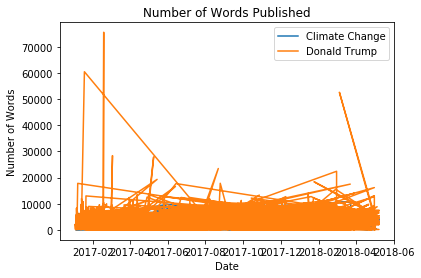

In [36]:
plt.plot(cc.lastPublished, cc_adj_adv_df.total_words)
plt.plot(trump.lastPublished, trump_adj_adv_df.total_words)
plt.legend(['Climate Change', 'Donald Trump'])
plt.title('Number of Words Published')
plt.ylabel('Number of Words')
plt.xlabel('Date')
plt.show()

Since there are so many Donald Trump articles compared to Climate Change, this time series isn't very useful. There also looks like there might be some outliers, some very large article sizes. The scatter plot below also suggests the same thing.

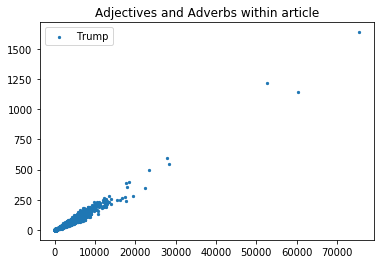

In [37]:
plt.scatter(trump_adj_adv_df.total_words, trump_adj_adv_df.adj_and_advs, 5)
plt.title('Adjectives and Adverbs within article')
plt.legend(['Trump'])
plt.show()

The scatterplot below for Climate Change looks more like what we might expect. 

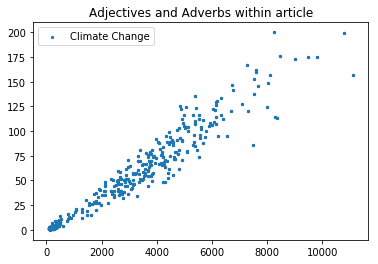

In [38]:
plt.scatter(cc_adj_adv_df.total_words, cc_adj_adv_df.adj_and_advs, 5)
plt.title('Adjectives and Adverbs within article')
plt.legend(['Climate Change'])
plt.show()

I have found that the data, being purely text based, does not naturally lend itself well to being shown graphically. I am not sure what value these visualizations give in terms of extra understanding. However, visualising the data in this way has revealed that for more conclusive findings as part of a more in depth study, the qualitity of the data must be inspected very throughly and outliers investigated. 

# Clustering

Currently, we still have two large datasets of BBC News articles; one tagged with the topic 'Donald Trump' and the other with 'Climate Change'. All articles tagged with these topics are mostly about Donald Trump or Climage Change, they will also touch on different areas also, and have different newsworthy angles and focuses. 

I decided that it would be good to investigate where there are any specific angles that are covered regularly. I will refer to these as 'themes' hereafter. It would interesting to see if there are any recurring themes in articles about these topics. I am asking: is something very specific written about very often under these given topics? If so, this _might_ suggest bias. 

Each dataset could be divided into groups, or themes, based on some measure of similarity that might be present. There is likely to be a difference in the common attributes of the Donald Trump articles compared with the Climate Change articles. All articles that represent a particular 'theme' within each dataset should be clustered into one group so they might then be compared and analysed for evidence impartiality. 

This is a clustering problem. Clustering is defined as grouping objects which are similar to each other and dissimilar to the objects in the other groupings (Bramer 2007). The objective in clusering is to maximise intracluster similarity and minimize intercluster similarity (Kolalapudi 2016a).

## Feature Extraction

The first step is representing text data using numeric attributes called features and the process of extracting them from the text is called feature extraction (Kolalapudi 2016a). There are various methods by which feature extraction can be performed, but the methods I shall be concerned with here are called 'Term Frequency' and 'TF-IDF'. 

### Term Frequency Representation using the 'Bag of Words' model.
Steps to performing Term Frequency
1. Create a list of all possible words that could appear any article. The list is of length `n`, where `n` is the number of words in the text. 
2. A tuple is created for each article where each word in the list of all words is represented by the number of times it occurred in the text. 
For example,
if all the possible words are `(these, are, all, the, possible, words, that, could, appear)` then the sentence `all these words are possible` would produce the tuple `(1, 1, 1, 0, 1, 1, 0, 0, 0)` which is called the Term Frequency Representation.

It is important to note all information regarding the order of the words in the text is lost, this is why this model is called 'Bag of Words' because it is likened to putting all the words in a bag (Kolalapudi 2016a). This is suitable for our initial experiment in discovering themes because we will be clustering based on the words themselves not the order they appeared in. 

### Term Freqency - Inverse Document Frequency
Term Freqency - Inverse Document Frequency (TF-IDF) enhances the Term Frequency Representation by recognising that some words are more important than others (Kolalapudi 2016a). TF-IDF works on the widely held supposition that a seldomly used word found in a sentence generally has more of an impact on the meaning of that sentence than other words (Kolalapudi 2016a). By taking this into account, I would like to a way of 'weighting' each word in my features to take into account its rarity. TF-IDF is a commonly used way of doing this. 

The method of finding the TF-IDF is to take the corpus, which is the entire dataset of articles, and the tuples of word frequencies, then weight each word's frequency by the inverse of the number of articles the word is present in (Kolalapudi 2016a). The term frequency is multiplied by the inverse of the document frequency which is why this method is called 'Term Freqency - Inverse Document Frequency' (Kolalapudi 2016a). 

### Getting the Corpus

I start the process of feature extraction by getting the corpuses of each dataset. I am using the `tokenized_words` to do this because it is my cleanest respresentation of the data so far. 

In [39]:
def get_corpus(df, column):
    corpus = []
    for i in range (len(df)):
        text = df[column].iloc[i]
        corpus.append(' '.join(text))
    return corpus

cc_corpus = get_corpus(cc_processed_df, 'tokenized_words')
trump_corpus = get_corpus(trump_processed_df, 'tokenized_words')

### Getting the TF-IDF

I am using a popular Data Science library, specifically for machine learning problems called SciKit Learn. I am using  built-in methods for creating the TF-IDF.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
trump_vec = TfidfVectorizer()
trump_tfid = trump_vec.fit_transform(trump_corpus)
trump_tfid

<3250x36560 sparse matrix of type '<class 'numpy.float64'>'
	with 697087 stored elements in Compressed Sparse Row format>

In [42]:
cc_vec = TfidfVectorizer()
cc_tfid = cc_vec.fit_transform(cc_corpus)
cc_tfid

<662x12800 sparse matrix of type '<class 'numpy.float64'>'
	with 146686 stored elements in Compressed Sparse Row format>

## K-Means Clustering

K-means clustering is described by Bramner (2007) as an 'exclusive clustering algorithm' because it assigns each object to only one of a set of clusters. This method was chosen because I am looking for distinct overarching themes that may be present within the news articles, I am not looking to put them into a hierarchy for example.

Steps to performing k-means clustering (Bramner 2007).
1. Decide on a value of `k` which is the number of clusters that should be found. 
2. Select the `k` objects in an arbitary fashion, these should be the inital set of `k` centroids. 
3. Each object is assigned one by one to the cluster which has the closet centroid. 
4. Now, it is very likely that the original centroids will no longer be the true centroids of each clusters, therefore a recalculation must be made and the process is repeated. 
5. Repeat steps 3. and 4. until the centroids do not change and convergence has been reached. 

What SciKit Learn referrs to as the `inertia` is what is usually referred to as the 'objective function': the sum of the squared distances of objects to their closest cluster centre (SciKit Learn 2017; Bramner 2007). The objective function should decrease with each iteration until the best clustering is found. 

Below the number of clusters is set to 3 and the maximum number of iterations is set to 99. I have chosen 3 from running this experiment several times and I find it to be a good number. Thankfully, the number of iterations before convergence has never gotten close to 99 in all the times I have run this experiment, but it is important to set the maximum number of iterations anyway (Bramner 2007). This is because although it can be proved that k-means clustering will always terminate, it does not always find the best set of clusters, corresponding the minimising the value of the objective function (Bramner 2007). 

The initial selection of centroids can too significantly affect the result (Bramner 2007). To overcome this, the algorithm can be run several times for a given value of `k`, each time with a different choice of inital `k` centroids (Bramner 2007). The set of clusters with the smallest value of the objective function is then chosen (Bramner 2007). The `n_init` value set is the 'number of time the k-means algorithm will be run with different centroid seeds' (SciKit Learn 2017). The final results from SciKit Learn are the best output of the `n_init` consecutive runs in terms of intertia (SciKit Learn 2017). From running this experiment several times and tweaking the numbers I have found that 4 is a good number of iterations to use. 

In [43]:
from sklearn.cluster import KMeans

cc_km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 99, n_init = 4, verbose = False )

cc_km.fit(cc_tfid)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=99,
    n_clusters=3, n_init=4, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)

In [44]:
cc_tfid

<662x12800 sparse matrix of type '<class 'numpy.float64'>'
	with 146686 stored elements in Compressed Sparse Row format>

I made a simple method to print some of the findings because the method's output, when set to verbose, is too verbose.

The labels show that there are 3 clusters (but we knew that because we set it) and it also shows the number of articles which have been assigned to each cluster in the second array.

In [45]:
def print_output(km): 
    string = 'objective funtion: {0}\n coordinates of cluster centres:\n {1}'.format(km.inertia_, km.cluster_centers_)
    labels = 'labels: \n{}'.format(np.unique(km.labels_ , return_counts=True))
    print(string)
    print(labels)
    
print_output(cc_km)

objective funtion: 597.2795467079283
 coordinates of cluster centres:
 [[0.         0.01322671 0.         ... 0.         0.         0.        ]
 [0.00096065 0.00393288 0.         ... 0.         0.         0.        ]
 [0.00176871 0.00776792 0.0014874  ... 0.00017597 0.00033896 0.00018543]]
labels: 
(array([0, 1, 2], dtype=int32), array([ 54, 170, 438]))


In [46]:
trump_km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 99, n_init = 4, verbose = False )
trump_km.fit(trump_tfid)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=99,
    n_clusters=3, n_init=4, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)

In [47]:
print_output(trump_km)

objective funtion: 3024.2096405389834
 coordinates of cluster centres:
 [[1.75371635e-03 7.70025137e-03 1.60166879e-05 ... 8.14353804e-05
  2.96778858e-05 2.96778858e-05]
 [7.63049930e-04 5.70589306e-03 0.00000000e+00 ... 1.10994922e-04
  0.00000000e+00 0.00000000e+00]
 [8.46861718e-04 2.12396846e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
labels: 
(array([0, 1, 2], dtype=int32), array([2322,  544,  384]))


The scatterplot below shows the positions of the centroids of the clusters. Projecting all points on the first two dimensions of the TF-IDF vector space produced a useless plot (Iliev 2018), therefore I have not included them.

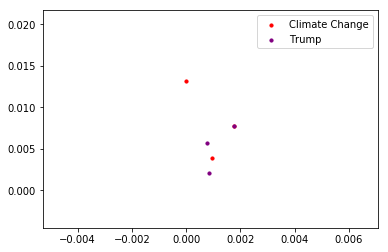

In [48]:
centroids_cc = cc_km.cluster_centers_
centroids_t = trump_km.cluster_centers_
plt.scatter(centroids_cc[:, 0], centroids_cc[:, 1], c='red', s=10)
plt.scatter(centroids_t[:, 0], centroids_t[:, 1], c='purple', s=10)
plt.legend(['Climate Change', 'Trump'])
plt.show()

### Identifying the Themes

The method below creates a dictionary for each corpus whereby the keys are the cluster numbers and the values are the aggregated text across all the articles that are within that cluster.

In [49]:
def dictionary_from_corpus(km, corpus):
    text = {}
    for i, cluster in enumerate(km.labels_):
        current = corpus[i]
        if cluster not in text.keys():
            text[cluster] = current
        else:
            text[cluster] += current
    return text

cc_cluster_dict = dictionary_from_corpus(cc_km, cc_corpus)
trump_cluster_dict = dictionary_from_corpus(trump_km, trump_corpus)

The next task is to find the most frequent words within that cluster. 

Through running and tweaking this experiment, I found it necessary add 'bbc' to the set of `stop_words` because it was appearing too often and is not helpful in identifying themes in BBC News articles. By the end of this method, the words have been tokenized, re-joined to find the TF-IDF and then tokenized again within this method. It is likely because of this that something odd was happening: 'n't' got treated as a word and was appearing often; therefore I also added this to the `stop_words`. 

`freq = FreqDist(word_sent)` calculates the frequency distribution of the words and `keywords[cluster] = nlargest(99, freq, key=freq.get)` finds the most important 100 words in that cluster (set to 99 because Python is zero-based). 

In [50]:
from nltk import FreqDist
from heapq import nlargest

stop_words.add('bbc')
stop_words.add("n't")

def get_freq_dist(dict):
    keywords = {}
    counts = {}
    for cluster in range(len(dict)):
        word_sent = word_tokenize(dict[cluster].lower())
        word_sent = [word for word in word_sent if word not in stop_words]
        freq = FreqDist(word_sent)
        keywords[cluster] = nlargest(99, freq, key=freq.get)
        counts[cluster] = freq
    return (keywords, counts)

cc_word_counts = get_freq_dist(cc_cluster_dict)
trump_word_counts = get_freq_dist(trump_cluster_dict)


The keywords that are unique to each cluster are found, and the top 12 for each corpus are shown below. 

In [51]:
def get_unique_keys(data, num_of_unique_keys=10):
    keywords = data[0]
    counts = data[1]
    unique_keys = {}
    length = len(counts)
    for cluster in range(length):
        other_clusters = list(set(range(length))-set([cluster]))
        keys_other_clusters = set(keywords[other_clusters[0]]).union(set(keywords[other_clusters[1]]))
        unique=set(keywords[cluster])-keys_other_clusters
        unique_keys[cluster]=nlargest(num_of_unique_keys,unique,key=counts[cluster].get)
    return unique_keys

cc_12_unique_keys = get_unique_keys(cc_word_counts, 12)
trump_12_unique_keys = get_unique_keys(trump_word_counts, 12)


In [52]:
print(trump_12_unique_keys)

{0: ['tax', 'bill', 'years', 'back', 'going', 'office', 'republicans', 'immigration', "'re", 'twitter', 'think', 'party'], 1: ['north', 'korea', 'nuclear', 'china', 'trade', 'deal', 'iran', 'ban', 'countries', 'climate', 'agreement', 'israel'], 2: ['russian', 'comey', 'fbi', 'investigation', 'intelligence', 'flynn', 'director', 'clinton', 'mueller', 'putin', 'team', 'committee']}


In [53]:
print(cc_12_unique_keys)

{0: ['scotland', 'scottish', 'targets', 'plan', 'target', 'committee', 'wales', 'action', 'transport', 'reduce', 'ministers', 'electricity'], 1: ['trump', 'president', 'deal', 'accord', 'coal', 'china', 'donald', 'decision', 'administration', 'house', 'white', 'state'], 2: ['ice', 'water', 'study', 'weather', 'sea', 'co2', 'around', 'air', 'record', 'earth', 'dr', 'data']}


I have applied human intelligence to the outcome of this exercise. I have concluded that the Donald Trump themes are 
0. US Politics
1. US Foreign Affairs
2. Russia

Personally, I am not suprised by these and nothing particularly unexpected has been revealed. 

Applying the same logic to the Climate Change themes I deduce that they are
0. UK Nations
1. Donald Trump
2. Global Warming

One of those overarching themes in the Climate Change corpus is certainly very interesting because it seems to be about Donald Trump! This might suggest that in further investigation regarding the impartiality of a topic a much broader corpus of articles must be considered since news under other topics can also be very informing.

# Classification

The original datasets included a one sentence summary to accompany every article. Each summary is extremely austere compared to the longer, hopefully more expository article. Comparing the two _might_ suggest a measure of impartiality: has the full article been embellished with bias? Or has there been bias inflicted in regard to deciding what information to leave out of the summary? As an inital investigation into this hypothesis, Each summary will be classified against the themes found above. Similar numbers of summaries should be found in each theme cluster as the articles themselves if the summaries are good, no? Like with all other aspects of this coursework, it is unlikely to be conclusive but may prompt ideas for futher investigation. 

Wanting to classify an article into a set of existing themes is a very typical classification problem (Kolalapudi 2016b). The classification exercise performed here will make use of the results of the clustering problem above. 

## K-Nearest Neighbours

From the clustering experiment above, the full articles are now grouped into different themes and can be represented as points in an n-dimensional space (Kolalapudi 2016b). To classify one of the accompnaying summaries, that summary can also be represented using the TF-IDF representation as a tuple of `n` numbers and can be represented by another point in this n-dimensional space (Kolalapudi 2016b). 

The K-Nearest Neighbors algorithm finds the K articles that are the nearest to the summary being classified (Kolalapudi 2016b). Depending on which cluster of articles the majority of the nearest neighbors of the summary belong to, the summary being classified is assigned to that corresponding cluster (Kolalapudi 2016b). 

Conveniently, the training phase for this experiment has already been carried out. The training was representing all the articles as points in an n-dimensional space. The test step takes a new instance, finds the K-Nearest Neighbors, and assigns the article to the cluster where most of its nearest neighbors belong (Kolalapudi 2016b).

I am using the SciKit Learn framework again to carry out this exercise. The number of neighbours is set by default to be five which means that the test instance will be classified based on only the closest five nearest neighbours. After running the experiment several times and tweaking the `n_neighbors` attribute, I have decided that 15 is a good number for this exercise.

In [54]:
from sklearn.neighbors import KNeighborsClassifier

cc_classifier = KNeighborsClassifier(n_neighbors=70)
cc_classifier.fit(cc_tfid, cc_km.labels_)

cc_test = cc_vec.transform(cc['summary'])
cc_predictions = cc_classifier.predict(cc_test).tolist()

trump_classifier = KNeighborsClassifier(n_neighbors=15)
trump_classifier.fit(trump_tfid, trump_km.labels_)

trump_test = trump_vec.transform(trump['summary'])
trump_predictions = trump_classifier.predict(trump_test).tolist()

def total_of_each_classification(ls):
    dict = {0: 0, 1: 0, 2: 0}
    for csn in ls:
        dict[csn] += 1
    return dict

def totals_in_original_clusters(km):
    l = np.unique(km.labels_ , return_counts=True)[1].tolist()
    dict = {0: l[0], 1: l[1], 2: l[2]}
    return dict

trump_clusters = totals_in_original_clusters(trump_km)
trump_classifications = total_of_each_classification(trump_predictions)

cc_clusters = totals_in_original_clusters(cc_km)
cc_classifications = total_of_each_classification(cc_predictions)

print('Original Clusters')
print(trump_clusters)
print(cc_clusters)

print('Classification of Summaries')
print(trump_classifications)
print(cc_classifications)


Original Clusters
{0: 2322, 1: 544, 2: 384}
{0: 54, 1: 170, 2: 438}
Classification of Summaries
{0: 2592, 1: 409, 2: 249}
{0: 48, 1: 260, 2: 354}


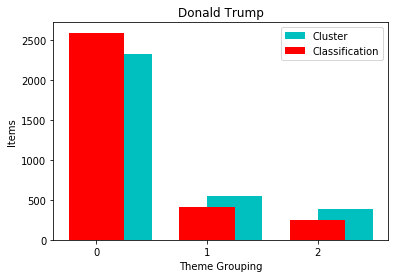

In [55]:
plt.bar(range(3), list(trump_clusters.values()), width=0.5, color='c', align='edge')
plt.xticks(range(3), list(trump_clusters.keys()))
plt.bar(range(3), list(trump_classifications.values()), width=0.5, color='r', align='center')
plt.legend(['Cluster', 'Classification'])
plt.title('Donald Trump')
plt.ylabel('Items')
plt.xlabel('Theme Grouping')
plt.show()

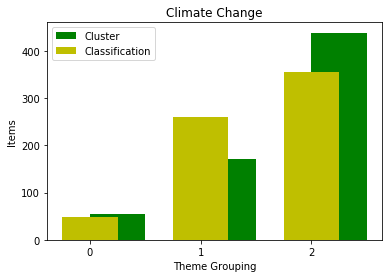

In [56]:
plt.bar(range(3), list(cc_clusters.values()), width=0.5, color='g', align='edge')
plt.xticks(range(3), list(cc_clusters.keys()))
plt.bar(range(3), list(cc_classifications.values()), width=0.5, color='y', align='center')
plt.legend(['Cluster', 'Classification'])
plt.title('Climate Change')
plt.ylabel('Items')
plt.xlabel('Theme Grouping')
plt.show()

The number of articles clustered within each theme does not appear to be wildly different from the numbers the classification assigned summaries to. This was an interesting initial investigation, however, text from the summary in the original dataset was in a completely different format to the original article bodies, because they were plain text and therefore did not undergo the same process of data cleaning. Additionally, the stopwords were not removed from the summaries which may have had some effect on the outcome.

# Conclusions

# Recommendations

Much of what has been carried out here is not very efficient and would not be suitable for big data. During the course of finding the themes, the text was initally tokenized as part of the data cleaning, re-joined to find the TF-IDF which takes string inputs, and then tokenized again to find the top 100 words. This is what likely lead to 'n't' being treated as a word. Clearly, this isn't efficient and it also lead to bizarre behaviour, which thankfully was caught. In addition to this, nearly all methods involved looping over the large datasets. Running all the methods involves doing so multiple times. A much more efficient workflow must be devised with the complexity of each algorithm carefully considered and could ultilize features of NumPy to help. 

Expertise of a linguist to help design meaningful data experiments. 

I would have liked to have done a seniment analysis but I didn't have access to a suitable training set. I would, ideally, like a wide variety of news readers to read articles and categorize them as partial or impartial. I did not have access to a way of crowdsourcing a large set. 


# References

Abrams, P. (2017) _Personal communication about BBC editorial policy and impartiality in news_ [Personal communication] November 2017 <br />
Aggarwal, C. and Zhai, C. (2012) Introduction to Text Mining in Aggarwal, C. and Zhai, C. (editors) _Mining Text Data_ Springer. http://library.books24x7.com.brad.idm.oclc.org/assetviewer.aspx?bookid=54151 Accessed 17<sup>th</sup> June 2018. <br />
BBC (2010) Section 4: Impartiality. in BBC _Editorial Guidelines_ London: BBC  http://downloads.bbc.co.uk/guidelines/editorialguidelines/pdfs/Section_04_Impartiality.pdf. Accessed 20<sup>th</sup> May 2018. <br />
BBC (2018) _Our Values_ http://www.bbc.co.uk/careers/why-join-us/values. Accessed 17<sup>th</sup> June 2018. <br />
BBC News (2017a) _Trump to BBC correspondent Jon Sopel: Here's another beauty_ https://www.bbc.co.uk/news/av/world-us-canada-38999996/trump-to-bbc-correspondent-jon-sopel-here-s-another-beauty Accessed 17<sup>th</sup> June 2018 <br />
BBC News (2017b) _White House bans certain news media from briefing_ https://www.bbc.co.uk/news/world-us-canada-39085235 Accessed 17<sup>th</sup> June 2018 <br /> 
BBC Trust (2017) _Charter and Agreement_ http://www.bbc.co.uk/bbctrust/governance/regulatory_framework/charter_agreement.html. Accessed 17<sup>th</sup> June 2018 <br />
Bramer, M. (2007) _Principles of Data Mining_. UK: Springer Science<br />
Dietrich, D., Heller, B. and Yang, B. (2015) _Data science and big data analytics : discovering, analyzing, visualizing and presenting data_. Indianapolis: John Wiley & Sons http://library.books24x7.com.brad.idm.oclc.org/assetviewer.aspx?bkid=72724&destid=1084#1084. Accessed 17<sup>th</sup> June 2018 <br />
Iliev, H. (2018) _Visualize Sparse Input from SKlearn Kmeans with MatplotLib_ https://stackoverflow.com/questions/50898910/visualize-sparse-input-from-sklearn-kmeans-with-matplotlib/50900411#50900411. Accessed 17<sup>th</sup> June 2018 <br />
Kolalapudi, S. (2016a) _Understanding the Clustering Workflow_ [video]. https://app.pluralsight.com/library/courses/python-natural-language-processing/table-of-contents. Accessed 29<sup>th</sup> May 2018. <br />
Kolalapudi, S. (2016b) _Understanding the Classification Workflow_ [video]. https://app.pluralsight.com/library/courses/python-natural-language-processing/table-of-contents. Accessed 29<sup>th</sup> May 2018. <br />
Kolalapudi, S. (2016c) _Stemming and POS Tagging_ [video]. https://app.pluralsight.com/library/courses/python-natural-language-processing/table-of-contents. Accessed 29<sup>th</sup> May 2018. <br />
NLTK (2016) _Natural Language Toolkit_ https://www.nltk.org/ Accessed 17<sup>th</sup> June 2018 <br />
Pandas (2018) _Python Data Analysis Library_ https://pandas.pydata.org/ Accessed 17<sup>th</sup> June 2018 <br />
SciKit Learn (2017) _sklearn.cluster.KMeans_. SciKit Learn Documentation. http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. Accessed 15<sup>th</sup> June 2018. <br />
UCL (1998) _Wh- Adverbs_ https://www.ucl.ac.uk/internet-grammar/adverbs/wh.htm Accessed 17<sup>th</sup> June 2018 <br />
University of Pennsylvania (2003) _Alphabetical list of part-of-speech tags used in the Penn Treebank Project_ http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html. Accessed 16<sup>th</sup> June 2018 <br />
Varone, M. (2016) _Natural language processing and text mining_ https://www.expertsystem.com/natural-language-processing-and-text-mining/ Accessed 17<sup>th</sup> June 2018 <br />
Warburton, C., Hickman, L., Happer, C. and Jordan, D. (2018) _Why is Climate Change so Hard for News?_ [Seminar] BBC Salford Quays 